## 파이토치 설치

## 파이토치 설치 확인

In [1]:
import torch

# CUDA 사용 가능 여부 확인
cuda_available = torch.cuda.is_available()
print(f"CUDA Available: {cuda_available}")

# 사용 가능한 GPU 개수 확인
gpu_count = torch.cuda.device_count()
print(f"Number of GPUs Available: {gpu_count}")

# 현재 사용 중인 디바이스 이름 출력
if cuda_available:
    current_device = torch.cuda.current_device()
    device_name = torch.cuda.get_device_name(current_device)
    print(f"Current CUDA Device: {current_device}")
    print(f"Device Name: {device_name}")

CUDA Available: True
Number of GPUs Available: 1
Current CUDA Device: 0
Device Name: NVIDIA GeForce RTX 3090


## 한국해양대학교 자연어처리 연구실 NER 데이터셋

In [5]:
!git clone https://github.com/kmounlp/NER.git

Cloning into 'NER'...
Updating files:  89% (1564/1755)
Updating files:  90% (1580/1755)
Updating files:  91% (1598/1755)
Updating files:  92% (1615/1755)
Updating files:  93% (1633/1755)
Updating files:  94% (1650/1755)
Updating files:  95% (1668/1755)
Updating files:  96% (1685/1755)
Updating files:  97% (1703/1755)
Updating files:  98% (1720/1755)
Updating files:  99% (1738/1755)
Updating files: 100% (1755/1755)
Updating files: 100% (1755/1755), done.


In [2]:
import os
import glob

In [3]:
file_list = []

In [4]:
for i in os.walk("data/NER/"):
    for j in glob.glob(os.path.join(i[0], "*_NER.txt")):
        file_list.append(j)

In [5]:
file_list = sorted(file_list)

In [6]:
for file_path in file_list:
    print(file_path)
print(len(file_list))

data/NER/말뭉치 - 형태소_개체명\00002_NER.txt
data/NER/말뭉치 - 형태소_개체명\00003_NER.txt
data/NER/말뭉치 - 형태소_개체명\00004_NER.txt
data/NER/말뭉치 - 형태소_개체명\00005_NER.txt
data/NER/말뭉치 - 형태소_개체명\00006_NER.txt
data/NER/말뭉치 - 형태소_개체명\00007_NER.txt
data/NER/말뭉치 - 형태소_개체명\00008_NER.txt
data/NER/말뭉치 - 형태소_개체명\00009_NER.txt
data/NER/말뭉치 - 형태소_개체명\00010_NER.txt
data/NER/말뭉치 - 형태소_개체명\00011_NER.txt
data/NER/말뭉치 - 형태소_개체명\00012_NER.txt
data/NER/말뭉치 - 형태소_개체명\00013_NER.txt
data/NER/말뭉치 - 형태소_개체명\00014_NER.txt
data/NER/말뭉치 - 형태소_개체명\00015_NER.txt
data/NER/말뭉치 - 형태소_개체명\00016_NER.txt
data/NER/말뭉치 - 형태소_개체명\00017_NER.txt
data/NER/말뭉치 - 형태소_개체명\00018_NER.txt
data/NER/말뭉치 - 형태소_개체명\00019_NER.txt
data/NER/말뭉치 - 형태소_개체명\00020_NER.txt
data/NER/말뭉치 - 형태소_개체명\00021_NER.txt
data/NER/말뭉치 - 형태소_개체명\00022_NER.txt
data/NER/말뭉치 - 형태소_개체명\00023_NER.txt
data/NER/말뭉치 - 형태소_개체명\00024_NER.txt
data/NER/말뭉치 - 형태소_개체명\00025_NER.txt
data/NER/말뭉치 - 형태소_개체명\00026_NER.txt
data/NER/말뭉치 - 형태소_개체명\00027_NER.txt
data/NER/말뭉치 - 형태소_개체명\00028_NER.txt
d

In [7]:
from pathlib import Path

file_path = file_list[0]
file_path = Path(file_path)
raw_text = file_path.read_text(encoding="utf-8").strip()

In [8]:
print(raw_text[0:1000])

## 1
## 오에 겐자부로는 일본 현대문학의 초석을 놓은 것으로 평가받는 작가 나쓰메 소세키(1867~1916)의 대표작 ‘마음’에 담긴 군국주의적 요소, 야스쿠니 신사 참배 행위까지 소설의 삽화로 동원하며 일본 사회의 ‘비정상성’을 문제 삼는다.
## <오에 겐자부로:PER>는 <일본:LOC> 현대문학의 초석을 놓은 것으로 평가받는 작가 <나쓰메 소세키:PER>(<1867~1916:DUR>)의 대표작 ‘<마음:POH>’에 담긴 군국주의적 요소, <야스쿠니 신사:ORG> 참배 행위까지 소설의 삽화로 동원하며 <일본:ORG> 사회의 ‘비정상성’을 문제 삼는다.
오에	오에	NNG	B-PER
_	_	_	I-PER
겐자부로	겐자부로	NNP	I-PER
는	는	JX	O
_	_	_	O
일본	일본	NNP	B-LOC
_	_	_	O
현대	현대	NNG	O
문학	문학	NNG	O
의	의	JKG	O
_	_	_	O
초석	초석	NNG	O
을	을	JKO	O
_	_	_	O
놓	놓	VV	O
은	은	ETM	O
_	_	_	O
것	것	NNB	O
으로	으로	JKB	O
_	_	_	O
평가	평가	NNG	O
받	받	VV	O
는	는	ETM	O
_	_	_	O
작가	작가	NNG	O
_	_	_	O
나쓰메	나쓰메	NNP	B-PER
_	_	_	I-PER
소세키	소세키	NNP	I-PER
(	(	SS	O
1867	1867	SN	B-DUR
~	~	SO	I-DUR
1916	1916	SN	I-DUR
)	)	SS	O
의	의	JKG	O
_	_	_	O
대표작	대표작	NNG	O
_	_	_	O
‘	‘	SS	O
마음	마음	NNG	B-POH
’	’	SS	O
에	에	JKB	O
_	_	_	O
담긴	담기+ㄴ	VV+ETM	O
_	_	_	O
군국주의	군국주의	NNG	O
적	적	XSN	O
_	_	_	O
요소	요소	NNG	O
,	,	SP	O
_	_	_	O
야스쿠니	야스쿠니	NNP	B-ORG
_	_	_	I-ORG
신사	신사	NNG	I-ORG
_	_	_	O
참배	참배	NNG	O
_	_	_	O
행위	행위	NNG	O
까지	까지	JX	O
_	_	_	O
소설

## NAVER NLP Challenge 2018 NER 데이터셋

In [8]:
!pip install korpora

  Using cached Korpora-0.2.0-py3-none-any.whl.metadata (26 kB)
  Using cached dataclasses-0.6-py3-none-any.whl.metadata (3.0 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
Using cached Korpora-0.2.0-py3-none-any.whl (57 kB)
Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl (102 kB)
Using cached

In [9]:
from Korpora import Korpora

corpus = Korpora.load("naver_changwon_ner")


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : 네이버 + 창원대
    Repository : https://github.com/naver/nlp-challenge/tree/master/missions/ner
    References : http://air.changwon.ac.kr/?page_id=10

    개체명(Named Entity)은 인명, 기관명, 지명 등과 같이 문장 또는 문서에서 특정한 의미를 가지고 있는 단어 또는 어구를 말합니다.
    이 때문에 개체명은 정보 검색 및 언어 이해를 위한 분석에서 주요한 대상으로 다루어지고 있습니다.
    Data.ly에서는 개체명 코퍼스를 제공하여 연구에 도움을 드리고자 하며, 공개적인 리더보드를 통해 많은 분들의 연구 동향을 논의/공유하고자 합니다.
    제공되는 코퍼스는 Data.ly에서 제작한 것으로, 연구 및 리더보드를 위한 학습으로 사용 가능하며 상업적인 목적으로 사용될 수 없습니다.

    # License
    연구 및 리더보드를 위한 학습으로 사용 가능하며 상업적인 목적으로 사용될 수 없습니다.

[Korpora] Corpus `naver_changwon_ner` is already installed at C:\Users\User\Korpora\naver_changwon_ner\train_data


In [10]:
# 네이버 데이터셋 출력
corpus.train[0:10]

WordTag(text=['비토리오 양일 만에 영사관 감호 용퇴, 항룡 압력설 의심만 가율 ', '이 음경동맥의 직경이 8 19mm입니다 . ', '9세이브로 구완 30위인 LG 박찬형은 평균자책점이 16.45로 준수한 편이지만 22⅓이닝 동안 피홈런이 31개나 된다 . ', '7승 25패는 상트페테르부르크가 역대 월드리그에 출진한 분별 최선의 성적이다 . ', '▲ 퍼거슨 씨족의 꾀 ', "[유로2008] '공인구가 변할 기록 시정조치는 죽을 맛 ? ' ", '로마올림픽에서 육미지황탕 이남지역으로 동메달에 머문 추경대는 차년 파리오픈 결승전에서 진 동영의 탄셰 차우세스쿠를 비롯해 몽골의 이창동 차간바, 발보나의 리자루드 박혜미셔 좌타자를 놓고 추축한다 . ', '금반 명기 통합우승 24, 10회차는 8일 상오 6시 50분, 상오 11시 50분에 발태가 끝마감되며, 비공식 적중결과는 5일 공표된다 . ', '권뢰가 있는 곳에 직경에 따라 달라지는데요 . ', '때로는은 귀여운 가스나기인 비담, 세상일에는 무관심 . '], words=[['비토리오', '양일', '만에', '영사관', '감호', '용퇴,', '항룡', '압력설', '의심만', '가율'], ['이', '음경동맥의', '직경이', '8', '19mm입니다', '.'], ['9세이브로', '구완', '30위인', 'LG', '박찬형은', '평균자책점이', '16.45로', '준수한', '편이지만', '22⅓이닝', '동안', '피홈런이', '31개나', '된다', '.'], ['7승', '25패는', '상트페테르부르크가', '역대', '월드리그에', '출진한', '분별', '최선의', '성적이다', '.'], ['▲', '퍼거슨', '씨족의', '꾀'], ['[유로2008]', "'공인구가", '변할', '기록', '시정조치는', '죽을', '맛', '?', "'"], ['로마올림픽에서', '육미지황탕', '이남지역으로', '동메달에', '머문', '추경대는', '차년', '파리오픈', '결승전에서'

## 상장법인목록

### pandas 설치


In [12]:
!pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)


In [11]:
import pandas as pd

org = pd.read_csv("data/상장법인목록.csv", encoding="utf-8")
org_df = org.iloc[:, 0:1]

In [12]:
print(org_df)

           회사명
0         옵티코어
1       아이오바이오
2          타이드
3       신영스팩9호
4          신스틸
...        ...
2563    CJ대한통운
2564     메리츠화재
2565        경방
2566     유수홀딩스
2567  한진중공업홀딩스

[2568 rows x 1 columns]


## 데이터셋 전처리

1. ORG를 제외한 다른 모든 tag는 'O'로 변환해주도록 합니다. 

    - 뉴스에서 뽑아내야 할 entity 정보가 ORG이기 때문입니다.

 

2. 앞서 불러온 상장법인목록 리스트의 회사명을 랜덤으로 데이터 셋의 ORG와 교체해주도록 합니다.

    - 학습 데이터셋에 회사명이 포함된 데이터가 별로 없어서 기업명을 잘 뽑아내지 못할 것  같습니다.

    - 그래서 상장법인목록 리스트의 회사명을 랜덤으로 데이터셋에 ORG 텍스트와 변경해줬습니다.

 

3. 단어 단위로 부착된 태그를 음절 단위로 태그를 다시 부착해주도록 하겠습니다.

    - 왜 멀쩡한 단어를 음절 단위로 쪼개는지?

    - BertTokenizer를 사용할 것인데 여기에는 8000개 밖에 안되는 한국어가 들어있지만 많은 수가 음절입니다. 

    - 한국어들이 거의 음절로 존재하기 때문에 음절 단위 tokenizer를 적용하면 vocab id를 어느정도 얻을 수 있습니다.

    - 그렇기 때문에 음절로 쪼개면 UNK가 별로 없이 나오기 때문에 음절 단위로 학습을 진행했습니다.

 

4. ORG 단어의 첫 음절에는 B-ORG 태그를 다음 음절부터는 I-ORG 태그를 부착하도록 합니다.

### 음절 단위로 나누기

In [13]:
import re
import random


def read_file(file_list):
    token_docs = []
    tag_docs = []

    for file_path in file_list:
        file_path = Path(file_path)
        raw_text = file_path.read_text().strip()
        raw_docs = re.split(
            r"\n\t?\n", raw_text
        )  # raw_text를 \n\n 또는 \n\t\n 단위로 분리

        for doc in raw_docs:
            tokens = []
            tags = []

            for line in doc.split("\n"):
                if line[0:1] == "$" or line[0:1] == ";" or line[0:2] == "##":
                    continue
                try:
                    tag = line.split("\t")[3]  # 2: pos, 3: ner

                    if tag in ["B-ORG", "I-ORG"]:
                        if tag == "B-ORG":
                            token = random.sample(org_df["회사명"].tolist(), k=1)[
                                0
                            ]  # tag가 B-ORG이면 상장법인목록의 회사명 중 하나로 랜덤 대체
                        elif tag == "I-ORG":
                            token = None
                        else:
                            token = line.split("\t")[0]
                            tag = "O"
                    else:
                        token = line.split("\t")[0]
                        tag = "O"

                    for i, syllable in enumerate(token):  # 음절 단위로 자르기
                        tokens.append(syllable)
                        modi_tag = tag

                        if i > 0:
                            if tag[0] == "B":
                                modi_tag = "I" + tag[1:]  # BIO Tag 부착

                        tags.append(modi_tag)
                except:
                    continue

            token_docs.append(tokens)
            tag_docs.append(tags)

    return token_docs, tag_docs

In [14]:
texts, tags = read_file(file_list[:])

In [15]:
print(len(texts))
print(len(tags))

19263
19263


In [16]:
print(texts[0], end="\n\n")
print(tags[0])

['오', '에', '_', '겐', '자', '부', '로', '는', '_', '일', '본', '_', '현', '대', '문', '학', '의', '_', '초', '석', '을', '_', '놓', '은', '_', '것', '으', '로', '_', '평', '가', '받', '는', '_', '작', '가', '_', '나', '쓰', '메', '_', '소', '세', '키', '(', '1', '8', '6', '7', '~', '1', '9', '1', '6', ')', '의', '_', '대', '표', '작', '_', '‘', '마', '음', '’', '에', '_', '담', '긴', '_', '군', '국', '주', '의', '적', '_', '요', '소', ',', '_', 'S', 'M', ' ', 'L', 'i', 'f', 'e', ' ', 'D', 'e', 's', 'i', 'g', 'n', '_', '참', '배', '_', '행', '위', '까', '지', '_', '소', '설', '의', '_', '삽', '화', '로', '_', '동', '원', '하', '며', '_', '대', '동', '기', '어', '_', '사', '회', '의', '_', '‘', '비', '정', '상', '성', '’', '을', '_', '문', '제', '_', '삼', '는', '다', '.']

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

## NAVER NLP Challenge 2018 NER 데이터셋 전처리

In [17]:
def naver_read_file(file_list):

    token_docs = []
    tag_docs = []

    for doc in file_list:
        tokens = []
        tags = []
        list1 = doc.words
        list2 = doc.tags

        for text, docs in zip(list1, list2):
            try:
                tag = docs

                if tag == "ORG_B":
                    tag = "B-ORG"

                if tag in ["B-ORG"]:
                    if tag == "B-ORG":
                        token = random.sample(org_df["회사명"].tolist(), k=1)[0]
                    else:
                        token = text
                else:
                    token = text
                    tag = "O"

                for i, syllable in enumerate(token):  # 음절 단위로 자르기
                    tokens.append(syllable)
                    modi_tag = tag

                    if i > 0:
                        if tag[0] == "B":
                            modi_tag = "I" + tag[1:]  # BIO Tag 부착

                    tags.append(modi_tag)

            except:
                continue

        token_docs.append(tokens)
        tag_docs.append(tags)

    return token_docs, tag_docs

In [18]:
naver_text, naver_tags = naver_read_file(corpus.train)

### 전처리 샘플

In [19]:
print(naver_text[0], end="\n\n")
print(naver_tags[0])

['비', '토', '리', '오', '양', '일', '만', '에', '케', '이', '티', '앤', '지', '감', '호', '용', '퇴', ',', '항', '룡', '압', '력', '설', '의', '심', '만', '가', '율']

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


## 한국 해양대학교 데이터셋 + 네이버 데이터셋 합치기


전처리를 진행했을 때 수 많은 entity 태그 중 ORG만 뽑다보니 너무 많은 O가 생성돼 일부 데이터에서 ORG가 들어가있지 않은 문장은 제거하고 학습을 진행하는 방법도 있습니다만 여기서는 제거하지 않고 그냥 진행했습니다.

In [20]:
texts.extend(naver_text)
tags.extend(naver_tags)

In [21]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [22]:
for i, tag in enumerate(unique_tags):
    print(tag)  # 학습을 위한 label list 확인

I-ORG
B-ORG
O


## EDA

In [23]:
texts_len = [len(x) for x in texts]

Text(0, 0.5, 'Probability')

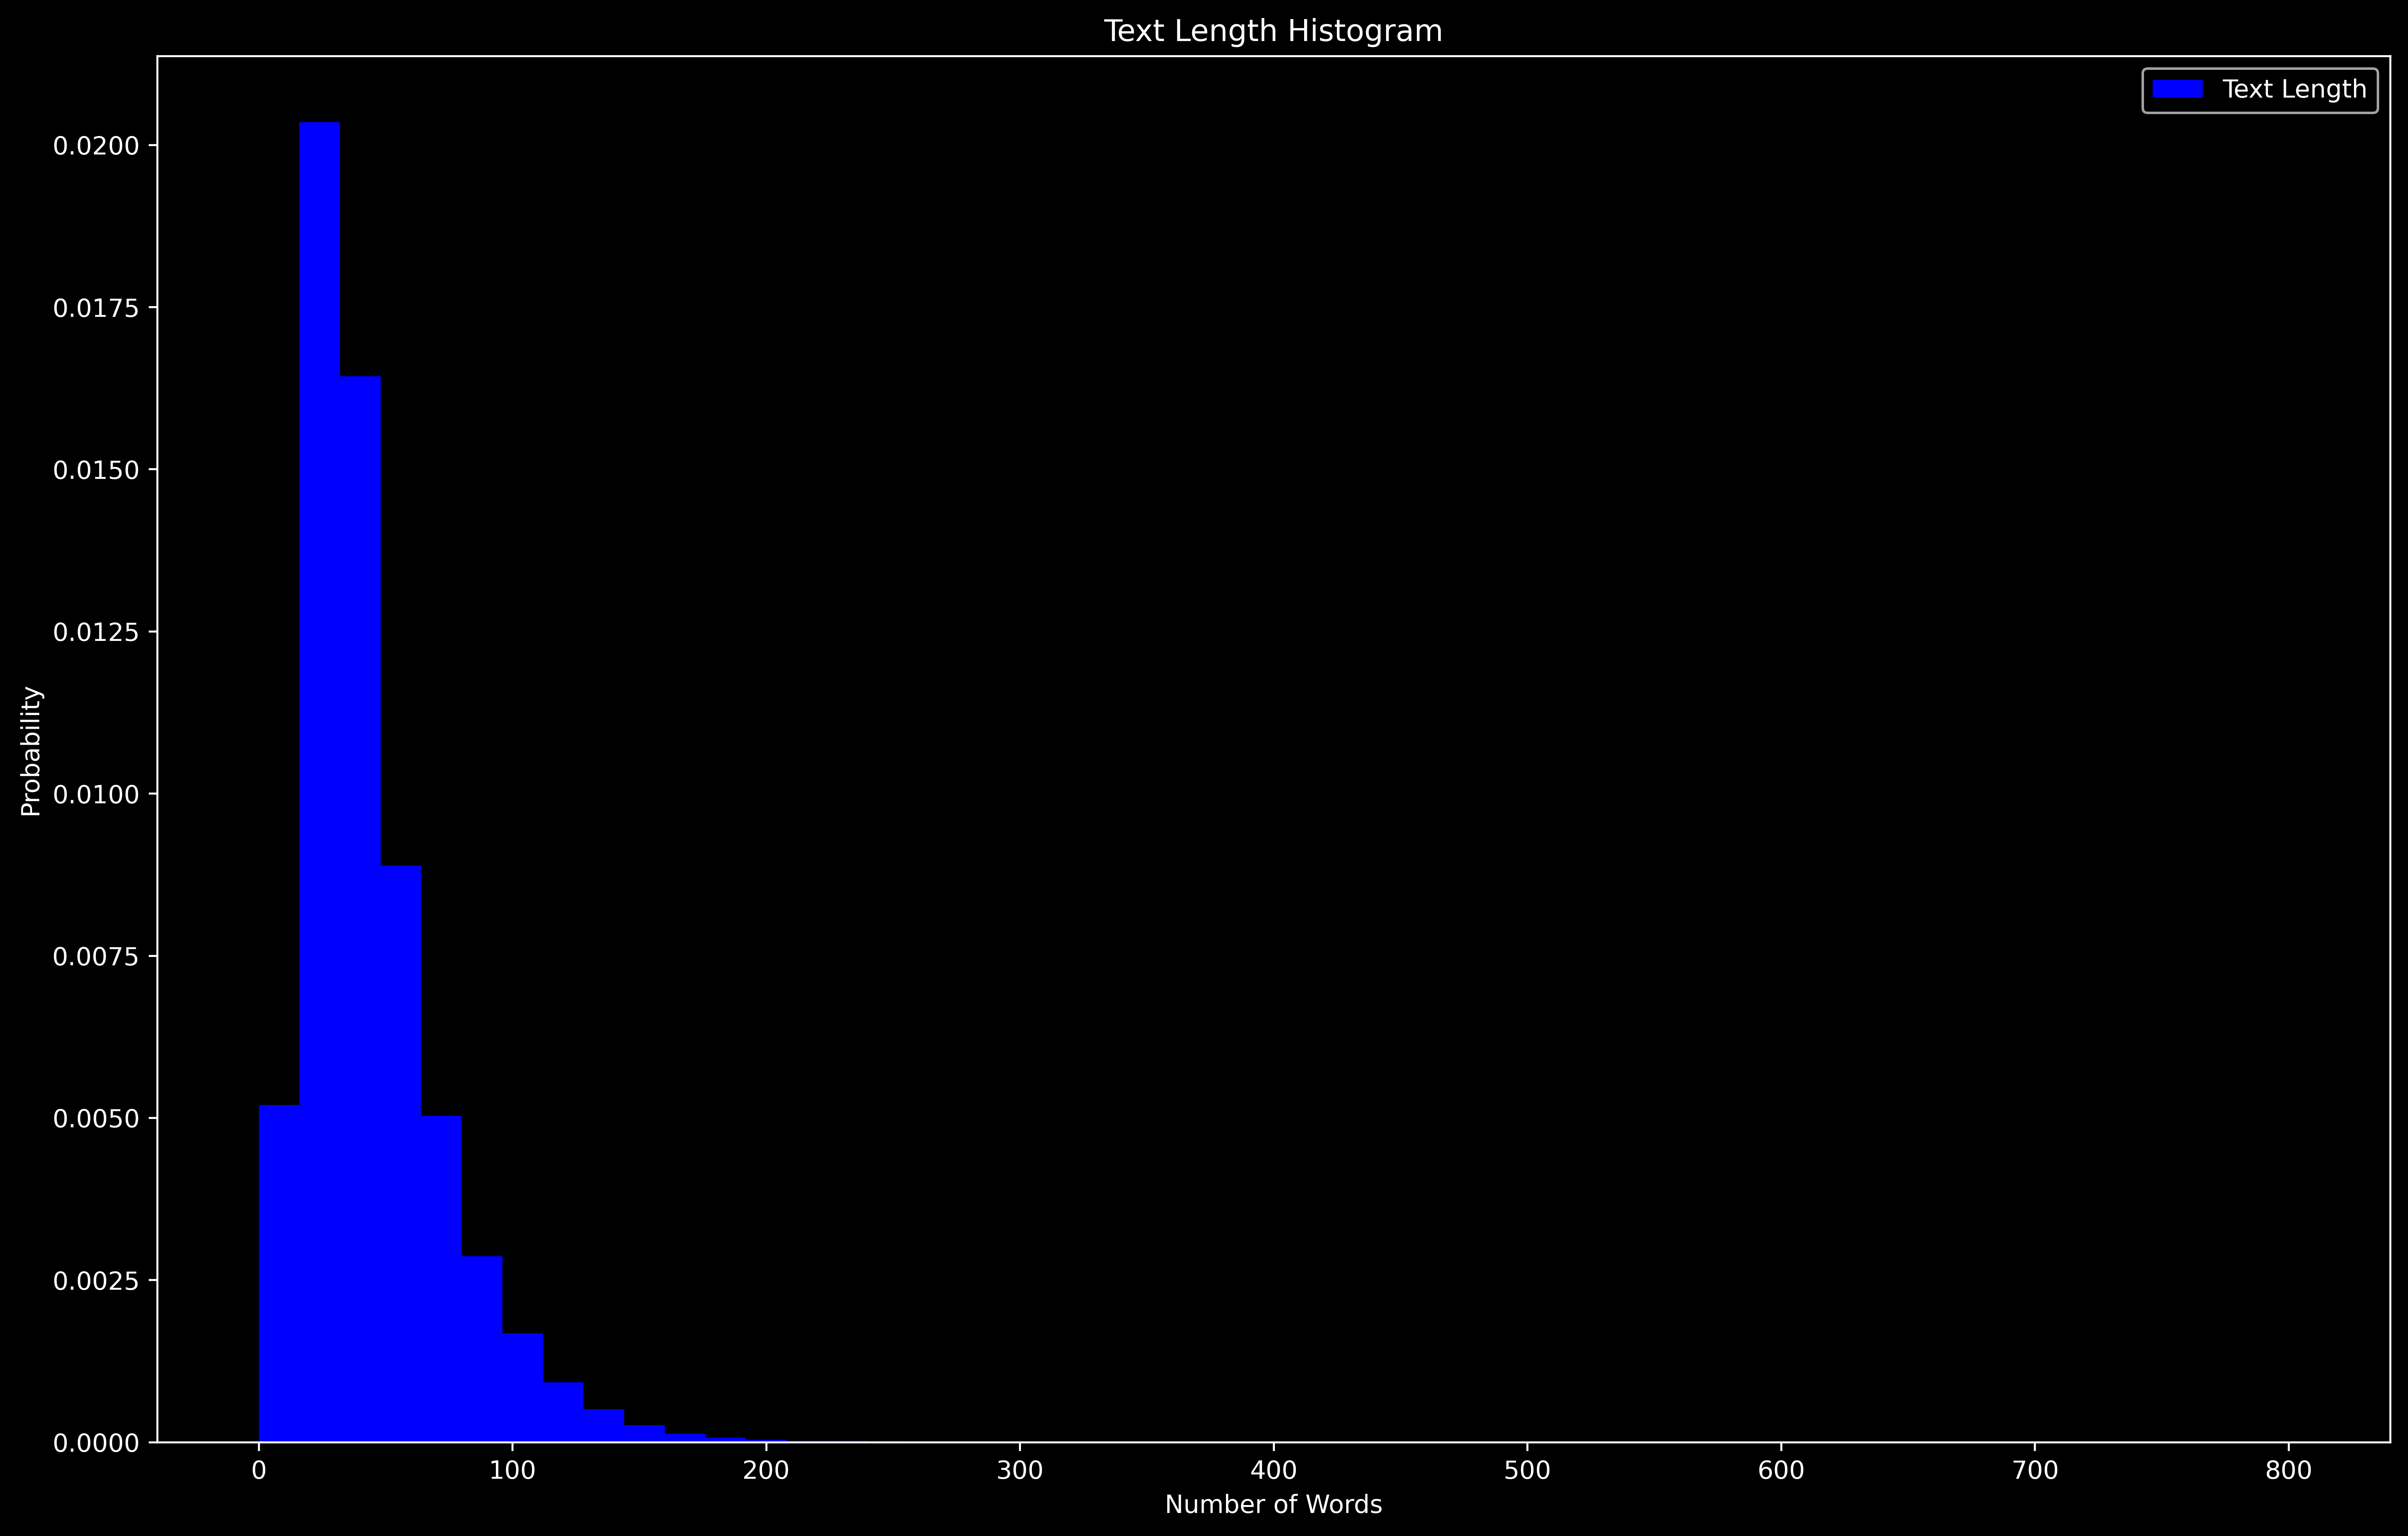

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10), dpi=500)
plt.hist(texts_len, bins=50, range=[0,800], facecolor='b', density=True, label='Text Length')
plt.title('Text Length Histogram')
plt.legend()
plt.xlabel('Number of Words')
plt.ylabel('Probability')

### 각 NER 태그별 데이터에 포함된 개수

In [25]:
for tag in list(tag2id.keys()):
    globals()[tag] = 0

In [26]:
for tag in tags:
    for ner in tag:
        globals()[ner] += 1


In [27]:
for tag in list(tag2id.keys()):
    print('{:>6} : {:>7,}'.format(tag, globals()[tag]))

 I-ORG : 206,924
 B-ORG :  53,949
     O : 4,532,021


## Train Test Split

In [57]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl (43.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [28]:
import sklearn

print(sklearn.__version__)

1.6.1


In [29]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_tags, test_tags = train_test_split(texts, tags, test_size=.2, random_state=42)

In [30]:
print('Train 문장 : {:>6,}'.format(len(train_texts)))
print('Train 태그 : {:>6,}'.format(len(train_tags)))
print('Test 문장 : {:>6,}'.format(len(test_texts)))
print('Test 문장 : {:>6,}'.format(len(test_tags)))

Train 문장 : 87,410
Train 태그 : 87,410
Test 문장 : 21,853
Test 문장 : 21,853


## Tokenizer

In [31]:
from transformers import AutoTokenizer, BertTokenizer, AutoModel, BertModel

model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

c:\Users\User\anaconda3\envs\ner-project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [33]:
pad_token_id = tokenizer.pad_token_id  # O
cls_token_id = tokenizer.cls_token_id  # 101
sep_token_id = tokenizer.sep_token_id  # 102

pad_token_label_id = tag2id['O']
cls_token_label_id = tag2id['O']
sep_token_label_id = tag2id['O']

### 음절 단위 토크나이저

In [34]:
def ner_tokenizer(sent, max_seq_length):
    pre_syllable = "_"
    input_ids = [pad_token_id] * (max_seq_length - 1)
    attention_mask = [0] * (max_seq_length - 1)
    token_type_ids = [0] * max_seq_length
    sent = sent[:max_seq_length - 2]

    for i, syllable in enumerate(sent):
        if syllable == "_":
            pre_syllable = syllable
        if pre_syllable != "_":
            syllable = "##" + syllable  # 중간 음절에는 모두 prefix를 붙임
            # 우리가 구성한 학습 데이터에도 이렇게 구성되었기 때문임.
            # 이순신은 조선 -> [이, ##순, ##신, ##은, 조, ##선]
        pre_syllable = syllable

        input_ids[i] = (tokenizer.convert_tokens_to_ids(syllable))
        attention_mask[i] = 1

    input_ids = [cls_token_id] + input_ids
    input_ids[len(sent) + 1] = sep_token_id

    attention_mask = [1] + attention_mask
    attention_mask[len(sent) + 1] = 1

    return {
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "token_type_ids": token_type_ids
    }


In [35]:
print(ner_tokenizer(train_texts[0], 5))  # 'token_type_ids': [O, O, O, O, O]은 segmentA로 OOOO으로 되어있는거

{'input_ids': [101, 9319, 12508, 17138, 102], 'attention_mask': [1, 1, 1, 1, 1], 'token_type_ids': [0, 0, 0, 0, 0]}


In [36]:
tokenized_train_sentences = []
tokenized_test_sentences = []

for text in train_texts:  # 전체 데이터를 tokenizing 함
    tokenized_train_sentences.append(ner_tokenizer(text, 128))

for text in test_texts:
    tokenized_test_sentences.append(ner_tokenizer(text, 128))


In [37]:
# 우리의 lable도 truncation과 tokenizing이 필요하다.

def encode_tags(tags, max_seq_length):
    # lable 역시 입력 token과 개수를 맞춰줍니다

    tags = tags[:max_seq_length - 2]
    labels = [tag2id[tag] for tag in tags]
    labels = [tag2id['O']] + labels

    padding_length = max_seq_length - len(labels)
    labels = labels + ([pad_token_label_id] * padding_length)

    return labels

In [38]:
tag2id

{'I-ORG': 0, 'B-ORG': 1, 'O': 2}

In [39]:
encode_tags(train_tags[0], 5)

[2, 2, 2, 2, 2]

In [40]:
train_labels = []
test_labels = []

for tag in train_tags:
    train_labels.append(encode_tags(tag, 128))

for tag in test_tags:
    test_labels.append(encode_tags(tag, 128))

In [41]:
len(train_labels), len(test_labels)

(87410, 21853)

### TokenDataset 변환

In [42]:
import torch

class TokenDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val) for key, val in self.encodings[idx].items()}
        item['labels'] = torch.tensor(self.labels[idx])

        return item
    
    def __len__(self):
        return len(self.labels)
    

train_dataset = TokenDataset(tokenized_train_sentences, train_labels)
test_dataset = TokenDataset(tokenized_test_sentences, test_labels)


## 모델 학습

In [86]:
%pip install 'accelerate>=0.26.0'

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'accelerate": Expected package name at the start of dependency specifier
    'accelerate
    ^


In [44]:
from transformers import BertForTokenClassification, Trainer, TrainingArguments, AutoModelForTokenClassification, EarlyStoppingCallback
import sys

training_args = TrainingArguments(
    output_dir='./results',  # 결과 저장 경로
    num_train_epochs=5,  # 학습 에폭 수
    per_device_train_batch_size=8,  # 학습 배치 크기
    per_device_eval_batch_size=64,  # 평가 배치 크기
    logging_dir='./logs',  # 로그 저장 경로
    logging_steps=1000,  # 로그 출력 간격(1000번째 steps마다 log를 보여줌)
    learning_rate=3e-5,  # 학습률
    weight_decay=0.01,
    save_total_limit=5,
    save_strategy='steps',  # steps로 해야 earlystop이 가능
    eval_strategy='steps',
    save_steps=1000,  # 1000번째 step마다 저장
    eval_steps=1000,  # 1000번째 step마다 평가
    seed=15,
    load_best_model_at_end=True  # 가장 좋은 성능의 모델로
)


In [45]:
model = AutoModelForTokenClassification.from_pretrained(model_name, num_labels=len(unique_tags))
model.to('cuda')

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]  # loss가 2번 감소하지 않으면 스탑
)


c:\Users\User\anaconda3\envs\ner-project\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--bert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-bas

In [46]:
trainer.train()


Step,Training Loss,Validation Loss


KeyboardInterrupt: 